<a href="https://colab.research.google.com/github/RakeshBB08/Deep_learning/blob/master/TF2_0_on_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense, Flatten, Dropout
from tensorflow.keras.models import Model


In [11]:
fashion_minst = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_minst.load_data()
print(x_train,y_train)
print(x_train.shape)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [9 0 0 ... 3 0 5]
(60000, 28, 28)


In [12]:
x_train,x_test = x_train/255.0, x_test/255.0

In [13]:
# the data is only 2D
# Convolutio  expects height x width x color
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [14]:
# number of classes
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [15]:
# Building the model using the functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides =2,activation = 'relu')(i)
x = Conv2D(64,(3,3),strides =2,activation = 'relu')(x)
x = Conv2D(128,(3,3),strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation = 'softmax')(x)

model = Model(i,x)

In [16]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
r = model.fit(x_train,y_train, validation_data = (x_test,y_test),epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 45s 22ms/step - loss: 0.5295 - accuracy: 0.8017 - val_loss: 0.4021 - val_accuracy: 0.8477
Epoch 2/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3634 - accuracy: 0.8631 - val_loss: 0.3602 - val_accuracy: 0.8608
Epoch 3/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3129 - accuracy: 0.8819 - val_loss: 0.3293 - val_accuracy: 0.8786
Epoch 4/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2814 - accuracy: 0.8937 - val_loss: 0.3047 - val_accuracy: 0.8909
Epoch 5/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2535 - accuracy: 0.9047 - val_loss: 0.3015 - val_accuracy: 0.8908
Epoch 6/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2331 - accuracy: 0.9110 - val_loss: 0.3008 - val_accuracy: 0.8915
Epoch 7/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2118 - accuracy: 0.9200 - val_loss: 0.2888 -

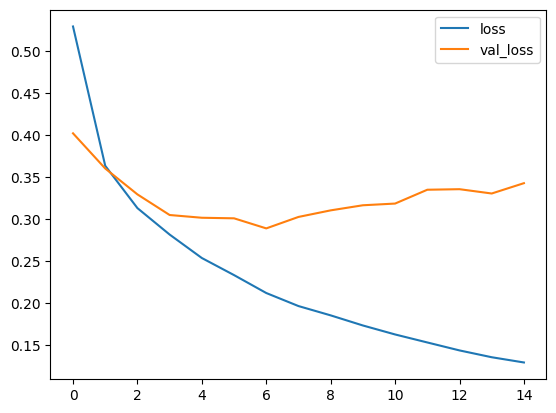

In [17]:
# plotting the loss
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

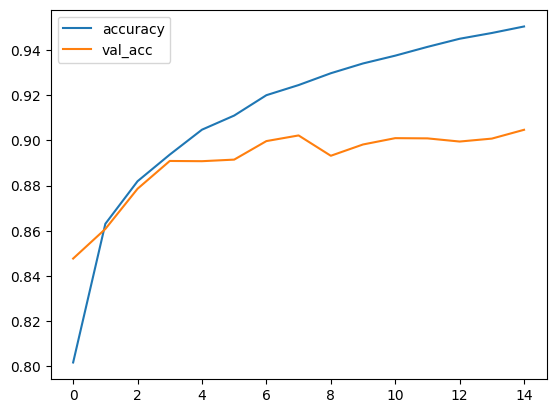

In [18]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()

In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3427 - accuracy: 0.9047


[0.34269577264785767, 0.904699981212616]

313/313 [==============================] - 4s 12ms/step
Confusion matrix, without normalisation
[[881   1  20  12   4   2  75   0   5   0]
 [  1 982   0   9   3   0   3   0   2   0]
 [ 21   0 883  11  41   0  41   0   3   0]
 [  9  16  20 891  42   0  20   0   2   0]
 [  0   0  61  17 870   0  51   0   1   0]
 [  0   0   0   0   0 978   0  14   1   7]
 [118   3  78  21  98   0 663   0  19   0]
 [  0   0   0   0   0  13   0 964   1  22]
 [  1   2   3   4   1   1   5   2 980   1]
 [  1   0   0   0   0   6   0  38   0 955]]


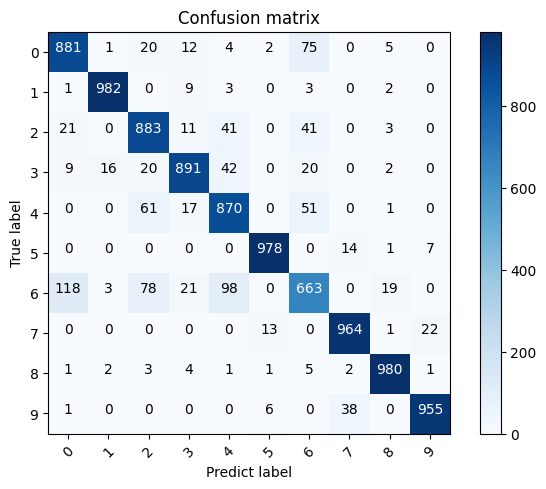

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize =False,title = 'Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis =1)[:,np.newaxis]
    print('Normalise confusion matrix')
  else:
    print('Confusion matrix, without normalisation')
  print(cm)

  plt.imshow(cm,interpolation ='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),horizontalalignment = 'center',
            color = 'white' if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predict label')
  plt.show()

p_test= model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 8, Predicted:3:')

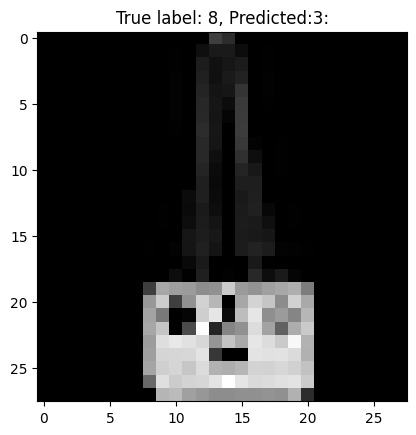

In [22]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i],cmap = 'gray')
plt.title(f"True label: {y_test[i]}, Predicted:{p_test[i]}:")